<a href="https://colab.research.google.com/github/czek0/Data-Science-Portfolio/blob/main/Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Driving Visual Anaylses with Automobile Data
This dataset, available at http://www.fueleconomy. gov/feg/epadata/vehicles.csv.zip, contains fuel efficiency performance metrics over time for all makes and models of automobiles in the United States of America. This dataset also contains numerous other features and attributes of the automobile models other than fuel economy, providing an opportunity to summarize and group the data so that we can identify interesting trends and relationships.

In [10]:
import numpy as np


In [1]:
import pandas as pd
import requests
import io
import zipfile

url = 'http://fueleconomy.gov/feg/epadata/vehicles.csv.zip'
r = requests.get(url)
zipfile_data = io.BytesIO(r.content)

with zipfile.ZipFile(zipfile_data, 'r') as zip_ref:
    csv_file = zip_ref.open(zip_ref.namelist()[0])

df = pd.read_csv(csv_file)

<ipython-input-1-71ed092dffce>:13: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [17]:
df.head()
df.shape

(47523, 84)

This tells us that columns 22, 23, 70, 71, 72, and 73 contain mixed data types. Let's find the corresponding names using the following commands:

In [14]:
column_names = df.columns.values
column_names[[22, 23, 70, 71, 72, 73]]


array(['cylinders', 'displ', 'atvType', 'fuelType2', 'rangeA', 'evMotor'],
      dtype=object)

##Preliminary analysis

In [23]:
print("length: ",len(df))
print("collumns: ", len(df.columns))
print(df.columns)

length:  47523
collumns:  84
Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel',
       'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c

Let's find out how many unique years of data are included in this dataset and what the first and last years are using the following command:

In [24]:
print("Unique years data: ", pd.unique(df.year))
print("Min year: ", min(df.year))
print("Max year: ", max(df.year))


Unique years data:  [1985 1993 1994 1995 1996 1997 1998 1999 2000 2001 1986 2002 2003 2004
 2005 2006 2007 2008 2009 2010 1984 1987 1988 1989 1990 1991 1992 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]
Min year:  1984
Max year:  2025


Let's find out what types of fuel are used as the automobiles' primary fuel types.

In [25]:
print("Types of fuel", pd.value_counts(df.fuelType1))

Types of fuel fuelType1
Regular Gasoline     30426
Premium Gasoline     14801
Diesel                1274
Electricity            766
Midgrade Gasoline      164
Natural Gas             60
Hydrogen                32
Name: count, dtype: int64


Now if we want to explore what types of transmissions these automobiles have, we immediately try the following command:

In [26]:
print("Types of transmissions:", pd.value_counts(df.trany))

Types of transmissions: trany
Automatic 4-spd                     11048
Manual 5-spd                         8391
Automatic (S6)                       3337
Automatic (S8)                       3157
Automatic 3-spd                      3151
Manual 6-spd                         3079
Automatic 5-spd                      2203
Automatic 6-spd                      1752
Manual 4-spd                         1483
Automatic (variable gear ratios)     1104
Automatic 8-spd                       978
Automatic (S5)                        848
Automatic (AM-S7)                     763
Automatic 9-spd                       745
Automatic (A1)                        730
Automatic 7-spd                       720
Automatic (S10)                       588
Automatic (S7)                        386
Automatic 10-spd                      380
Automatic (AV-S6)                     324
Automatic (AM7)                       318
Automatic (AM-S8)                     285
Automatic (S9)                        250
Auto

What we really want to know is the number of cars with automatic and manual transmissions. We notice that the trany variable always starts with the letter A when it represents an automatic transmission and M for manual transmission. Thus, we create a new variable, trany2, that contains the first character of the trany variable, which is a string:


In [27]:
df["trany2"] = df.trany.str[0]
print("New Types of Transmissions: ", pd.value_counts(df.trany2))

New Types of Transmissions:  trany2
A    34289
M    13223
Name: count, dtype: int64


## Data Analysis
We are going to look at some of the fuel efficiency metrics over time and in relation to other data points. To do so, we are going to have to replicate the functionality of two very popular R libraries, which are plyr and ggplot2, in Python. The split-apply-combine data analysis capabilities that are so handily covered by the plyr R library are handled equally well but in a slightly different fashion by pandas right out of the box.

Let's start by looking at whether there is an overall trend of how mpg changes over
time on average. We first want to group the data by year:

In [38]:
grouped = df.groupby("year")
# Next, we want to compute the mean of three separate columns by the previous grouping
averaged = grouped[['comb08',  'highway08','city08']].agg([np.mean])
averaged.head()

,comb08,highway08,city08
,mean,mean,mean
year,,,
1984,19.881874,23.075356,17.982688
1985,19.808348,23.042328,17.878307
1986,19.550413,22.699174,17.665289
1987,19.228549,22.445068,17.310345
1988,19.328319,22.702655,17.333628


To make life easier, we will rename the columns and then create a new column named year, which contains the data frame's index:

In [40]:
averaged.columns = ['comb08_mean','highway08_mean','city08_mean']
averaged['year'] = averaged.index
averaged.head()

,comb08_mean,highway08_mean,city08_mean,year
year,,,,
1984,19.881874,23.075356,17.982688,1984
1985,19.808348,23.042328,17.878307,1985
1986,19.550413,22.699174,17.665289,1986
1987,19.228549,22.445068,17.310345,1987
1988,19.328319,22.702655,17.333628,1988


Finally, we want to plot the results as a scatter plot

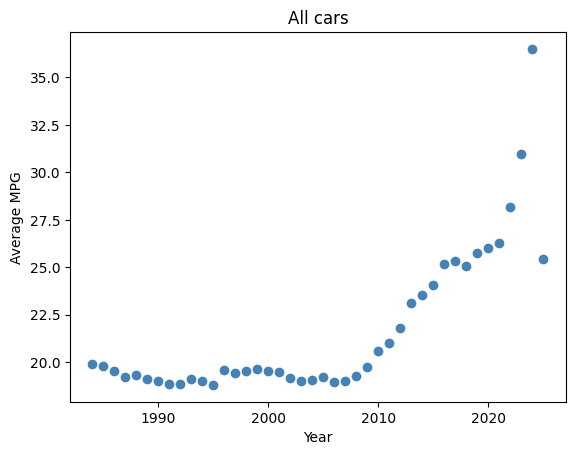

In [42]:
import matplotlib.pyplot as plt

# Convert the MultiIndex DataFrame to a regular DataFrame
#averaged = averaged.reset_index()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(averaged['year'], averaged['comb08_mean'], 'o', color='steelblue')

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average MPG')
ax.set_title('All cars')

# Show the plot
plt.show()

This plot might be misleading as hybrid cars with excellent mileage have recently become more popular.

To remove hybrid cars, we create three Boolean arrays. The criteria1 array selects those rows of the data frame where fuelType1 is Regular Gasoline, Premium Gasoline, or Midgrade Gasoline. The criteria2 array makes sure that the rows contain a null for fuelType2, and criteria3 ensures that the atvType is not Hybrid. We can perform the logical AND operation over these three Boolean arrays together to select only the desired rows from the data frame:

In [45]:
criteria1 = df.fuelType1.isin(["Regular Gasoline",
   "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = df.fuelType2.isnull()
criteria3 = df.atvType != "Hybrid"
vehicles_non_hybrid = df[criteria1 & criteria2 &
   criteria3]
len(vehicles_non_hybrid)

42120

We group the resulting data frame by year and then compute the mean combination fuel efficiency for each year, resulting in the following data frame:

In [46]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.838219
2012  21.407328
2013  22.225668
2014  22.274691
2015  22.413858
2016  22.717087
2017  22.801075
2018  22.825672
2019  22.710387
2020  22.634100
2021  22.277502
2022  22.176292
2023  22.014146
2024  22.090418
2025  24.082474


Based on the preceding data, we see that there is still a marked rise in the average miles per gallon even after eliminating hybrids.  The next question that we can ask is whether there have been fewer cars with large
engines built more recently? If this is true, it could explain the increase in average
miles per gallon. First, let's verify that larger engine cars have poorer miles per gallon. To look at this, we need to dig into the displ variable that represents the engine displacement in liters. Remember, pandas gave us a warning about this variable containing multiple data types, so let's compute the unique displ values:


In [47]:
pd.unique(vehicles_non_hybrid.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

We see that there are some values that might not be numeric, including the nan value. Let's remove all rows from the vehicles_non_hybrid data frame that have nan displ values and then do the same for the comb08 variable. In the process, let's use the astype method to ensure that each value is of type float, just in case:


In [49]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')

criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')


Finally, we will produce a scatter plot of the results again

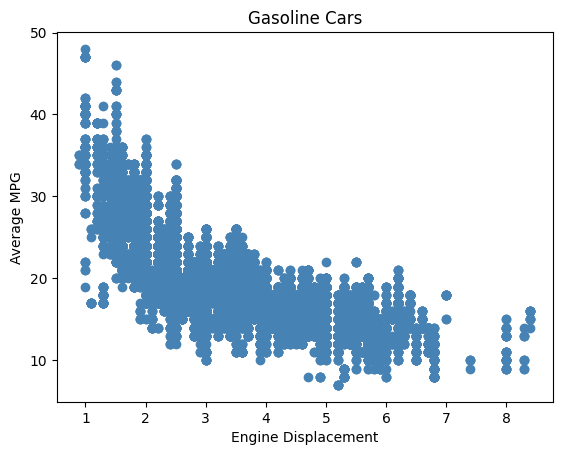

In [51]:
# Convert the MultiIndex DataFrame to a regular DataFrame
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(vehicles_non_hybrid['displ'], vehicles_non_hybrid['comb08'], 'o', color='steelblue')

# Set axis labels and title
ax.set_xlabel('Engine Displacement')
ax.set_ylabel('Average MPG')
ax.set_title('Gasoline Cars')

# Show the plot
plt.show()

The preceding plot seems to confirm a negative relationship between fuel economy and engine displacement.
Now, have there been fewer cars with large engines made recently?  Let's see whether smaller cars were made in later years on average:

In [53]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year[['displ','comb08']].agg([np.mean])

Next, let's plot both the average displ value and the average comb08 value by year on the same plot to look for trends. To do this, we need to reshape the avg_ grouped_by_year data frame to convert it from the wide format to the long format:

In [54]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year,
       id_vars='year')

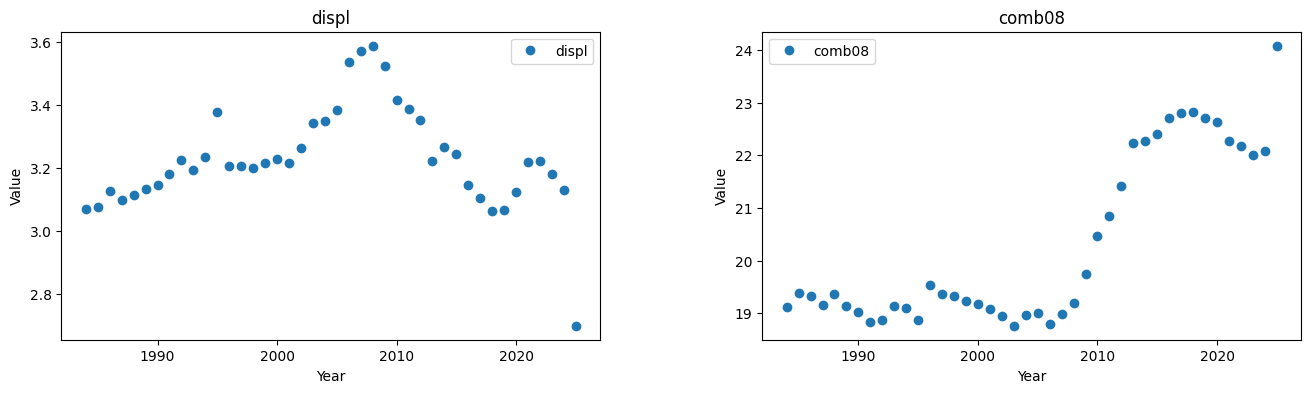

In [55]:

# Assuming melted_avg_grouped_by_year is a DataFrame with columns 'year', 'value', and 'variable_0'
years = melted_avg_grouped_by_year['year'].unique()
variables = melted_avg_grouped_by_year['variable_0'].unique()

# Create a figure with subplots for each variable
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(16, 4))

# Iterate over each variable and plot the data
for i, variable in enumerate(variables):
    data = melted_avg_grouped_by_year[melted_avg_grouped_by_year['variable_0'] == variable]
    axs[i].plot(data['year'], data['value'], 'o', label=variable)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_title(variable)
    axs[i].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

displ (Engine Displacement):

The values of engine displacement (displ) seem to be scattered widely, ranging from around 1.0 to 3.6 liters.
There appears to be no clear trend or pattern in the engine displacement over the years, suggesting that manufacturers produce vehicles with various engine sizes to cater to different market segments and consumer preferences.


comb08 (Combined Fuel Economy):

The values of combined fuel economy (comb08) are generally concentrated between 18 and 24 miles per gallon (mpg).
There is a noticeable upward trend in combined fuel economy over the years, indicating that vehicles have become more fuel-efficient over time.
In recent years (around 2020), there are a few data points showing higher combined fuel economy, likely representing hybrid or electric vehicles with improved fuel efficiency.

# Investigating the makes and models of automobiles
To continue our investigation of this dataset, we are going to examine the makes and models of the various automobiles more closely.

Let's look at how makes and models of cars inform us about fuel efficiency over time. First, let's look at the frequency of makes and models of cars available in the U.S., concentrating on 4-cylinder cars. To select the 4-cylinder cars, we first make the cylinders variable unique to see what the possible values are:


In [56]:
pd.unique(vehicles_non_hybrid.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

Let's convert the cylinders variable to float so that we can then easily subset the data frame:

In [58]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)



array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [59]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

Now, let's look at the numbers of makes that have 4-cylinder cars over the time frame that is available:

Axes(0.125,0.11;0.775x0.77)


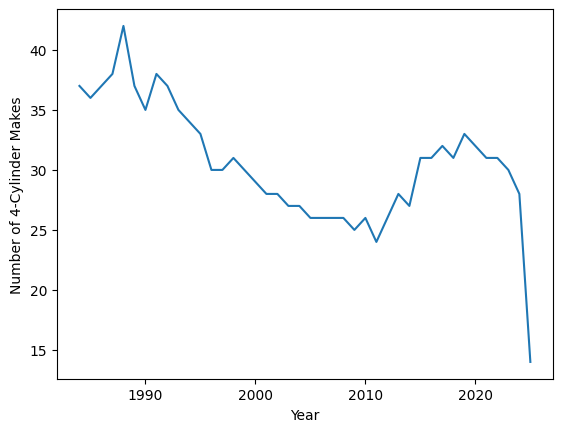

In [64]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print(fig)


We can see in the preceding graph that there has been a decline in the number of
makes with 4-cylinder engines available since 1980. However, as a caveat, this plot could be misleading, as we do not know if the total number of available makes per year has changed over the same period of time.

 Can we look at the makes that have been available every year of this study? First, we want to find a list of the automobile makes with 4-cylinder engines that were present in every year of this study. To do this, we first compute the unique list of makes per model year:

In [65]:
from functools import reduce
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])
unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
unique_makes = reduce(set.intersection, unique_makes)
print(unique_makes)

{'Subaru', 'Honda'}


We find that there are only 2 manufacturers that made 4-cylinder cars every year
during this period.
Now, we ask the question how these car manufacturers' models have performed
over time in terms of fuel efficiency. To do this, we decide to take the long way. First, we create an empty list that will eventually be populated by Booleans. We then iterate over each row in the data frame using the iterrows generator that yields both an index and row (we choose to do nothing with the index in the loop). We then test whether the make of the current row is in the unique_makes set computed previously and append the Boolean to the Boolean_mask set. After the loop is completed, we subset the data frame to contain only rows with a make within the set of unique_makes:


In [70]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)
df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [71]:
df_common_makes.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,trany2
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
5,13.523182,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,A
6,11.900400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
164,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,A
165,13.523182,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M


Next, we must group the data frame by both year and make and then compute the mean for each grouping:

In [76]:
numeric_cols = df_common_makes.select_dtypes(include=['number']).columns
# Include 'year' and 'make' columns for grouping
df_common_makes_grouped = df_common_makes[numeric_cols.union(['year', 'make'])].groupby(['year', 'make']).agg(np.mean).reset_index()

In [77]:
df_common_makes_grouped.head()

,year,make,UCity,UCityA,UHighway,UHighwayA,barrels08,barrelsA08,charge120,charge240,...,phevComb,phevHwy,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,youSaveSpend
0,1984,Honda,33.250000,0.0,44.833333,0.0,10.842990,0.0,0.0,0.0,...,0.0,0.0,12.833333,50.000000,0.0,0.0,0.0,0.0,0.0,-302.083333
1,1984,Subaru,27.058824,0.0,36.264706,0.0,13.103063,0.0,0.0,0.0,...,0.0,0.0,22.647059,36.882353,0.0,0.0,0.0,0.0,0.0,-2360.294118
2,1985,Honda,31.788191,0.0,42.595347,0.0,11.375045,0.0,0.0,0.0,...,0.0,0.0,12.031250,53.562500,0.0,0.0,0.0,0.0,0.0,-789.062500
3,1985,Subaru,26.620600,0.0,35.489676,0.0,13.204833,0.0,0.0,0.0,...,0.0,0.0,3.707317,23.609756,0.0,0.0,0.0,0.0,0.0,-2451.219512
4,1986,Honda,32.777775,0.0,44.437180,0.0,11.124121,0.0,0.0,0.0,...,0.0,0.0,15.400000,47.950000,0.0,0.0,0.0,0.0,0.0,-550.000000


Finally we display our results

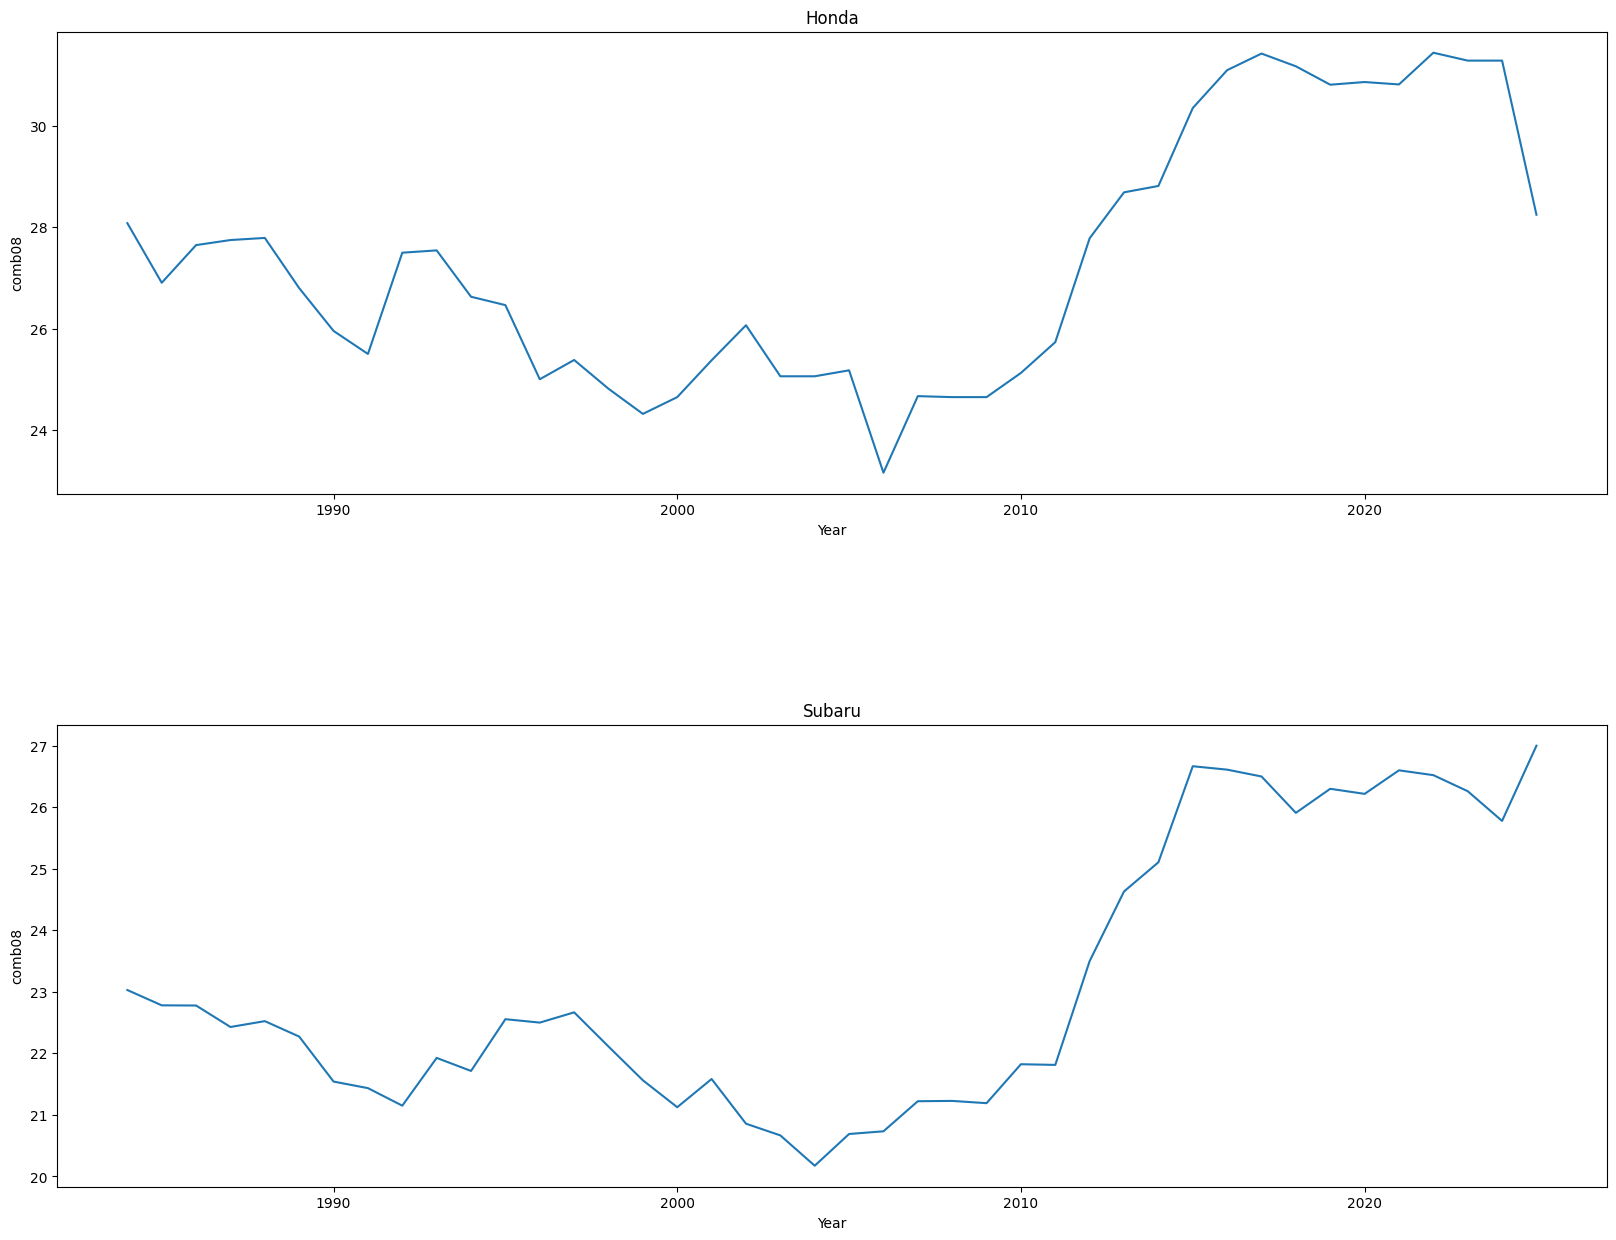

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_common_makes_grouped is a DataFrame with columns 'year', 'make', and 'comb08'
makes = df_common_makes_grouped['make'].unique()
num_makes = len(makes)

# Calculate the number of rows and columns for the table
num_rows = int(np.ceil(np.sqrt(num_makes)))
num_cols = int(np.ceil(num_makes / num_rows))

# Create a figure with a grid layout
fig = plt.figure(figsize=(20, 15))

# Iterate over each make and plot the data in the table
for i, make in enumerate(makes):
    data = df_common_makes_grouped[df_common_makes_grouped['make'] == make]

    # Calculate the position in the table
    row = i // num_cols
    col = i % num_cols

    # Create a subplot in the table
    ax = plt.subplot2grid((num_rows, num_cols), (row, col))
    ax.plot(data['year'], data['comb08'])
    ax.set_xlabel('Year')
    ax.set_ylabel('comb08')
    ax.set_title(make)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()

The provided graphs show the trends in combined fuel economy (combs) for Honda and Subaru vehicles from 1984 to 2023.

### Honda:
- **1984 - 2000**: Fluctuating fuel economy between 24 and 28 mpg.
- **2000 - 2010**: Decline below 24 mpg, recovering to around 26 mpg by 2010.
- **2010 - 2023**: Significant improvement, peaking above 30 mpg around 2018-2019, with a slight decline afterwards.

### Subaru:
- **1984 - 2000**: Downward trend from 23 to 21 mpg.
- **2000 - 2010**: Stable, fluctuating between 20 and 22 mpg.
- **2010 - 2023**: Sharp increase starting around 2010, peaking around 26 mpg by 2018-2019, with a slight recent increase.

### Comparative Insights:
- Both manufacturers improved fuel economy significantly from 2010 onwards, indicating advancements in vehicle technology.
- Honda maintains a higher average fuel economy compared to Subaru, especially in recent years.
- Historically, Honda's fuel economy varied more, while Subaru experienced a steady decline until improvements began around 2010.